### skip-gramモデルの学習コード

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_skip_gram.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any,Any}("say" => 2,"goodbye" => 3,"you" => 1,"hello" => 6,"." => 7,"and" => 4,"i" => 5), Dict{Any,Any}(7 => ".",4 => "and",2 => "say",3 => "goodbye",5 => "i",6 => "hello",1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_context_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32,3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleSkipGram(MatMul([[-0.01133421009604013 -0.0007652318938050793 … -0.004907759025808775 -0.0044446703322657604; -0.008976181877188957 -0.011447840379522648 … 0.002665044636288922 -0.004113568735570551; … ; -0.027012871530179134 -0.008966863673098364 … -0.015139030868619266 -0.002794114478116743; 0.0061202659660053935 0.002048769798668747 … 0.008831192773580451 -0.0010586339201708076]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.0002690414937485784 0.001366203423580075 … 0.006172727576675104 0.0009557475308952609; 0.0031377684336742844 0.018575218199488513 … 0.024915264154460052 0.005489563757832352; … ; 0.011724254415213922 0.00817552229296362 … -0.011512206471741868 -0.009788726058185657; 0.005618779390830796 0.0024221705263043473 … -0.00829087442141958 -0.01618124279700583]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), SoftmaxWithLoss(Any[], Any[], #undef, #undef

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 11.68
| epoch 0 | iter 2 / 2 | loss 11.67
| epoch 10 | iter 2 / 2 | loss 11.67
| epoch 20 | iter 1 / 2 | loss 11.67
| epoch 20 | iter 2 / 2 | loss 11.65
| epoch 30 | iter 2 / 2 | loss 11.64
| epoch 40 | iter 1 / 2 | loss 11.6
| epoch 40 | iter 2 / 2 | loss 11.59
| epoch 50 | iter 2 / 2 | loss 11.54
| epoch 60 | iter 1 / 2 | loss 11.44
| epoch 60 | iter 2 / 2 | loss 11.4
| epoch 70 | iter 2 / 2 | loss 11.31
| epoch 80 | iter 1 / 2 | loss 11.17
| epoch 80 | iter 2 / 2 | loss 10.77
| epoch 90 | iter 2 / 2 | loss 11.07
| epoch 100 | iter 1 / 2 | loss 10.86
| epoch 100 | iter 2 / 2 | loss 10.67
| epoch 110 | iter 2 / 2 | loss 10.63
| epoch 120 | iter 1 / 2 | loss 10.5
| epoch 120 | iter 2 / 2 | loss 10.32
| epoch 130 | iter 2 / 2 | loss 10.29
| epoch 140 | iter 1 / 2 | loss 9.97
| epoch 140 | iter 2 / 2 | loss 9.95
| epoch 150 | iter 2 / 2 | loss 9.82
| epoch 160 | iter 1 / 2 | loss 9.66
| epoch 160 | iter 2 / 2 | loss 9.52
| epoch 170 | iter 2 / 2 | loss 9.48


In [7]:
using Plots
gr()

Plots.GRBackend()

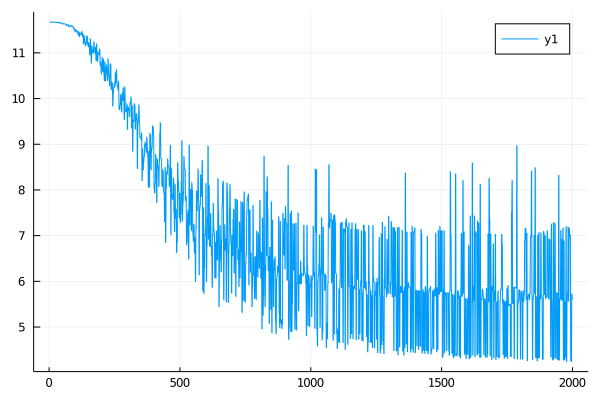

In [8]:
plot(trainer.loss_list)

#### MatMulレイヤの重みを表示

In [9]:
for (word_id, word) = id_to_word
    println("$(word) $(model.word_vecs[word_id, :])")
end

. [0.0061202659660053935, 0.002048769798668747, 0.012067923637697205, 0.008831192773580451, -0.0010586339201708076]
and [0.007428134851383727, -6.301474885735909e-5, -0.008419000221621308, 0.007133374604463862, -0.005161608079452481]
say [-0.008976181877188957, -0.011447840379522648, 0.0015878296000481104, 0.002665044636288922, -0.004113568735570551]
goodbye [0.000558282179072373, 0.014950665235731833, 0.011578327095559919, 0.013176861150245611, 0.0057939785329724595]
i [0.03148410340443367, -0.020731263032912874, 0.00984580675430315, -0.004359221335931647, -0.029813652837677004]
hello [-0.027012871530179134, -0.008966863673098364, -0.012024986176287219, -0.015139030868619266, -0.002794114478116743]
you [-0.01133421009604013, -0.0007652318938050793, 0.00571448885840021, -0.004907759025808775, -0.0044446703322657604]
